# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


### Use case

In [195]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
print(df.head())
df['price_change'] = df['price'].diff()
print(df.head())


         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price  
0    One_storey  207700  
1    One_storey  208400  
2    One_storey  209200  
3    One_storey  210100  
4    One_storey  210600  
         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005

In [196]:

df['price_increased'] = (df['price_change'] > 0).astype(int)
df.head()

,Date,Median income,Population,Mortgage Rate,Interest Rate,property_type,price,price_change,price_increased
0,2005-01-01,4487.5,1.069167e+07,5.60,2.75,One_storey,207700,NaN,0
1,2005-02-01,4487.5,1.069167e+07,5.59,2.75,One_storey,208400,700.0,1
2,2005-03-01,4487.5,1.069167e+07,5.60,2.75,One_storey,209200,800.0,1
3,2005-04-01,4487.5,1.071352e+07,5.67,2.75,One_storey,210100,900.0,1
4,2005-05-01,4487.5,1.071352e+07,5.55,2.75,One_storey,210600,500.0,1


In [197]:
df.describe()

,Median income,Population,Mortgage Rate,Interest Rate,price,price_change,price_increased
count,1045.000000,1.045000e+03,1045.000000,1045.000000,1.045000e+03,1044.000000,1045.000000
mean,4908.341308,1.172827e+07,4.572297,1.691388,3.998625e+05,571.647510,0.772249
std,222.128572,6.417847e+05,0.946217,1.262333,1.544395e+05,35295.094854,0.419582
min,4487.500000,1.069167e+07,3.200000,0.500000,1.720000e+05,-832200.000000,0.000000
25%,4783.333333,1.117077e+07,3.860000,0.750000,2.852000e+05,300.000000,1.000000
50%,4894.166667,1.169366e+07,4.320000,1.250000,3.648000e+05,1900.000000,1.000000
75%,5047.500000,1.226719e+07,5.150000,2.000000,4.746000e+05,3400.000000,1.000000
max,5430.833333,1.289414e+07,6.810000,4.750000,1.085300e+06,46300.000000,1.000000


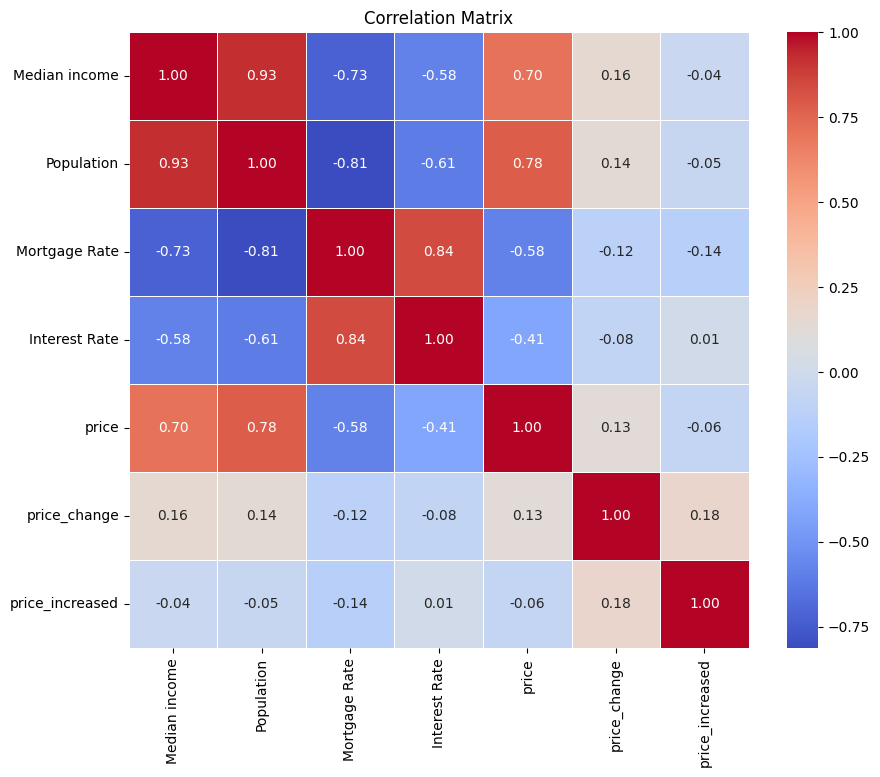

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


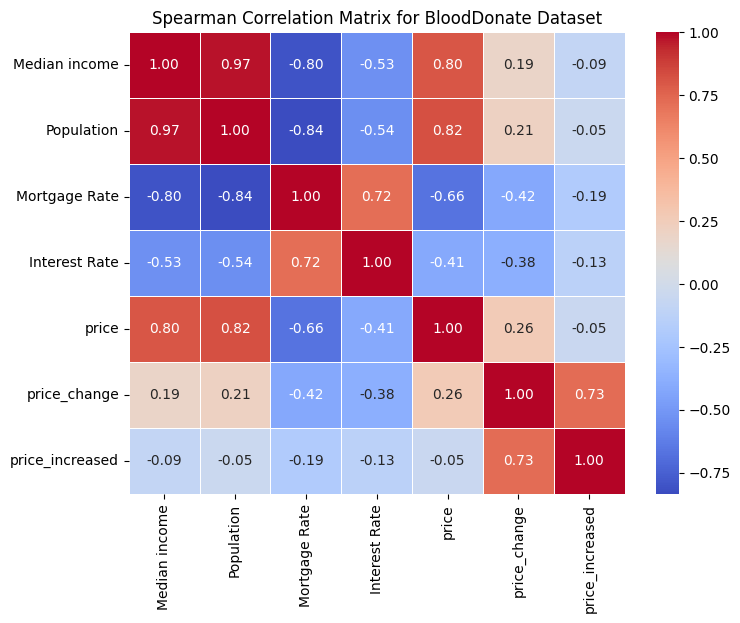

In [199]:
# Calculate correlation matrix using Spearman method
correlation_matrix_spearman = numeric_columns.corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman Correlation Matrix for house price Dataset")
plt.show()

In [200]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# 
features = ['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']
X = df[features]
y = df['price_increased']

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 
model = LogisticRegression()
model.fit(X_train, y_train)

# 
print("Model Accuracy:", model.score(X_test, y_test))

# 
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Model Accuracy: 0.7799043062200957
Median income: 0.0016
Population: -0.0000
Mortgage Rate: -0.0000
Interest Rate: 0.0000
